In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline


In [2]:
variable = pd.read_csv(r"C:\Users\cdot\Downloads\House_prediction.csv")
variable.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
variable.shape


(10692, 13)

In [4]:
variable.replace("furnished",1,inplace=True)
variable.replace("not furnished",0,True)
variable.replace("acept",1,inplace=True)
variable.replace("not acept",0,inplace=True)
variable.replace("-",0,True)
variable=variable.astype({"floor":"int64"})

Text(0, 0.5, 'mean area')

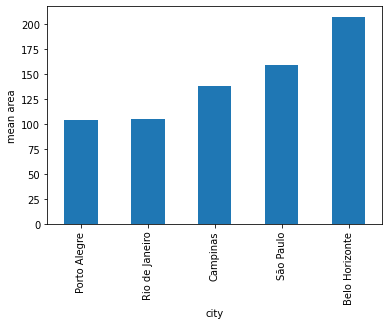

In [5]:
variable.groupby("city").area.mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean area')

Text(0, 0.5, 'mean rooms')

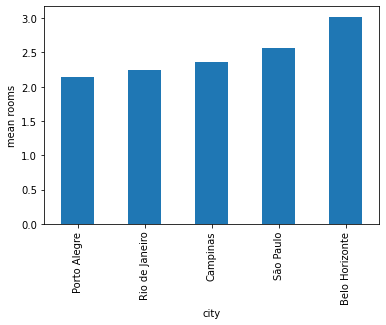

In [6]:
variable.groupby("city").rooms.mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean rooms')

Text(0, 0.5, 'mean number of bathrooms')

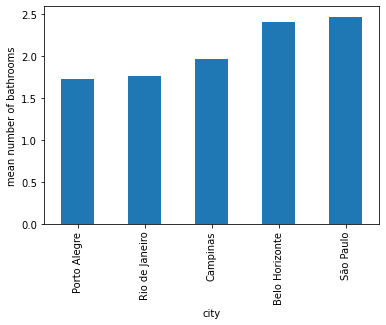

In [7]:
variable.groupby("city").bathroom.mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean number of bathrooms')

Text(0, 0.5, 'mean hoa')

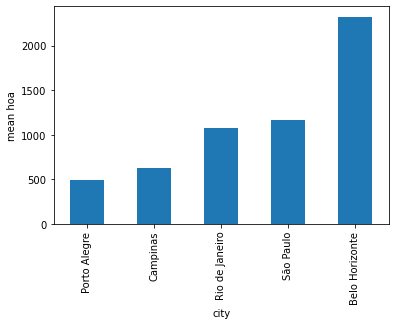

In [8]:
variable.groupby("city")["hoa (R$)"].mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean hoa')

Text(0, 0.5, 'mean total')

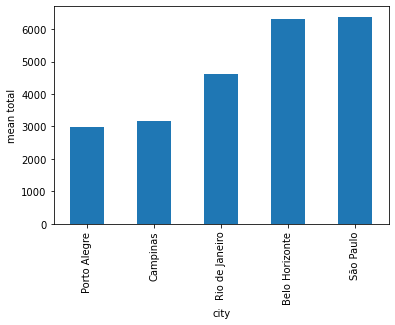

In [9]:
variable.groupby("city")["total (R$)"].mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean total')

Text(0, 0.5, 'mean rent amount')

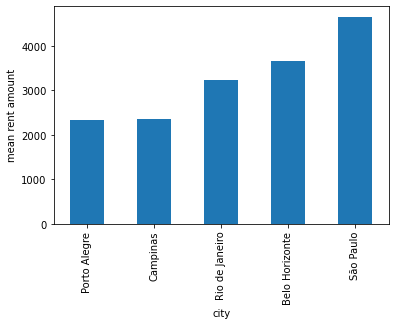

In [10]:
variable.groupby("city")["rent amount (R$)"].mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean rent amount')


Text(0, 0.5, 'mean property tax')

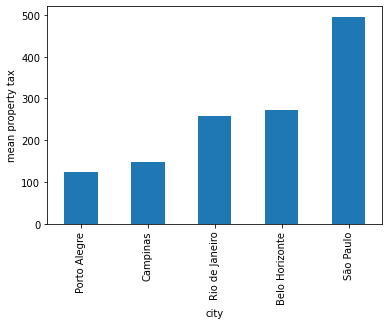

In [11]:
variable.groupby("city")["property tax (R$)"].mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean property tax')

Text(0, 0.5, 'mean fire insurance')

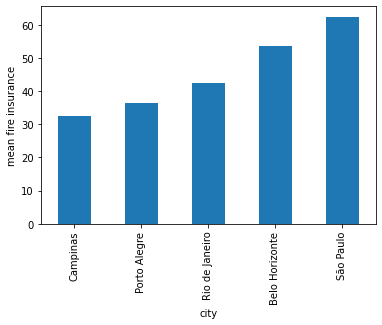

In [12]:
variable.groupby("city")["fire insurance (R$)"].mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean fire insurance')


Text(0, 0.5, 'mean parking spaces')

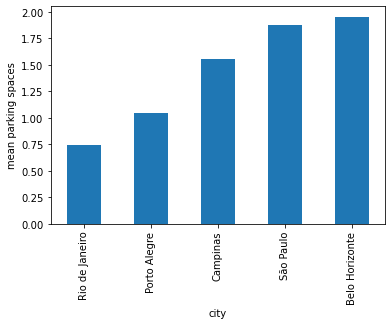

In [13]:
variable.groupby("city")["parking spaces"].mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean parking spaces')

Text(0, 0.5, 'mean floor number')

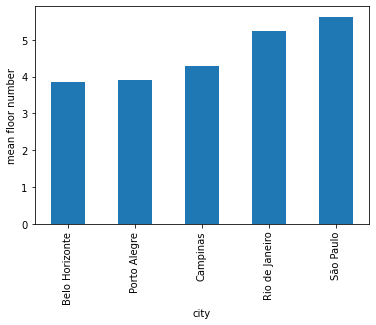

In [14]:
variable.groupby("city")["floor"].mean().sort_values(ascending=True)[0:].plot.bar()
plt.xlabel('city')
plt.ylabel('mean floor number')

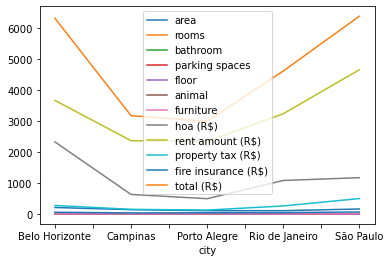

In [15]:
variable.groupby("city").mean().plot()

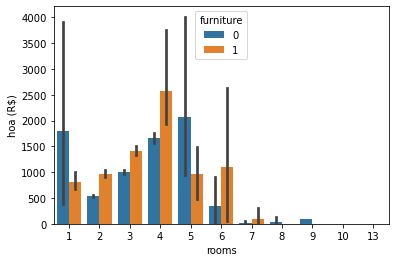

In [16]:
sns.barplot(variable["rooms"],variable["hoa (R$)"],hue=variable["furniture"])

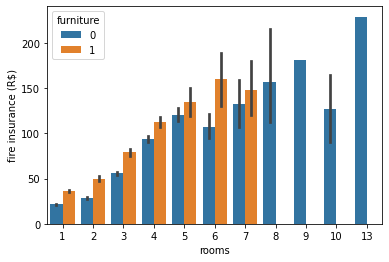

In [17]:
sns.barplot(variable.rooms,variable["fire insurance (R$)"],hue=variable["furniture"])

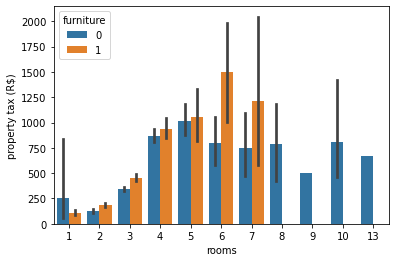

In [18]:
sns.barplot(variable.rooms,variable["property tax (R$)"],hue=variable["furniture"])

In [19]:
X = variable[['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)','total (R$)']].values
y = variable['rent amount (R$)'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0647, random_state=0)

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
df = pd.DataFrame({'Actual rent tax': y_test, 'Predicted rent tax': y_pred})
df.head()

,Actual rent tax,Predicted rent tax
0,1650,1649.843798
1,3500,3499.877135
2,4000,3999.775825
3,5010,5009.755363
4,5000,4999.986192


In [24]:
df1 = df.head()

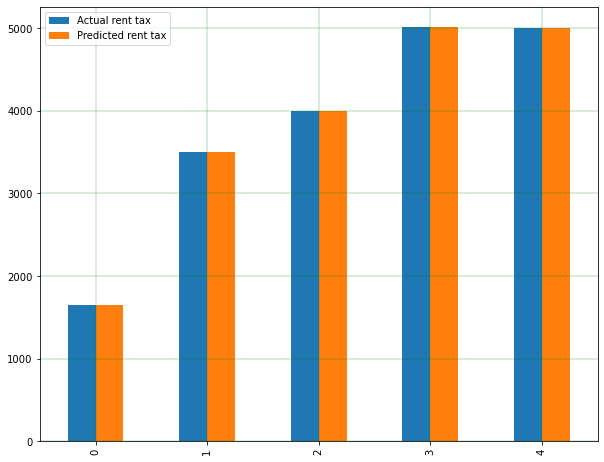

In [25]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.show()

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5377523429182202
Mean Squared Error: 1.326681104390236
Root Mean Squared Error: 1.1518164369335229
